# Support Vector Machines

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.svm import SVC

In [3]:
x = np.array(np.random.randint(0, 5, size = 12))

In [4]:
x

array([3, 4, 0, 0, 3, 2, 3, 2, 1, 3, 2, 3])

In [5]:
x = x.reshape(6,2)

In [6]:
x

array([[3, 4],
       [0, 0],
       [3, 2],
       [3, 2],
       [1, 3],
       [2, 3]])

In [7]:
y = np.array(np.random.randint(7, 14, size = 12))

In [8]:
y = y.reshape(6,2)

In [9]:
y

array([[ 8,  9],
       [ 9, 10],
       [12, 11],
       [ 8,  8],
       [ 9, 12],
       [10, 13]])

In [10]:
z = np.vstack((x, y))

In [11]:
cl = np.array([0,0,0,0,0,0,1,1,1,1,1,1])

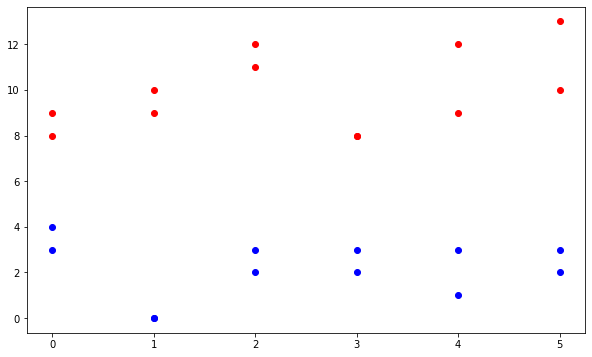

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(x, 'ro', color='blue')
plt.plot(y, 'ro', color='red')

In [13]:
svc = SVC()
svc.fit(z, cl)

SVC()

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
svc.predict([[8, 13]])

array([1])

In [16]:
svc.predict([[0, 3]])

array([0])

In [17]:
# installazione di mlxtend da terminale
# pip install mlxtend  

In [18]:
from mlxtend.plotting import plot_decision_regions

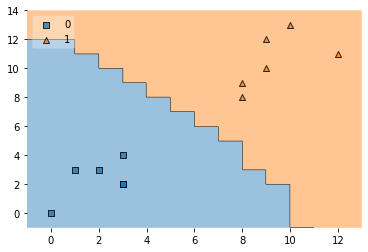

In [20]:
plot_decision_regions(z, cl, clf = svc, res = 0.02, legend = 2)

# Secondo esempio su dataset più grande

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
# importare dataset

In [7]:
# dataset tratto dal sito AnalyticsVidhya

In [8]:
df = pd.read_csv("Prostate_Cancer.csv")

In [9]:
print(df.head(5))

   id diagnosis_result  radius  texture  perimeter  area  smoothness  \
0   1                M      23       12        151   954       0.143   
1   2                B       9       13        133  1326       0.143   
2   3                M      21       27        130  1203       0.125   
3   4                M      14       16         78   386       0.070   
4   5                M       9       19        135  1297       0.141   

   compactness  symmetry  fractal_dimension  
0        0.278     0.242              0.079  
1        0.079     0.181              0.057  
2        0.160     0.207              0.060  
3        0.284     0.260              0.097  
4        0.133     0.181              0.059  


In [10]:
df.drop("id", axis = 1, inplace = True)

In [11]:
print(df.head(5))

  diagnosis_result  radius  texture  perimeter  area  smoothness  compactness  \
0                M      23       12        151   954       0.143        0.278   
1                B       9       13        133  1326       0.143        0.079   
2                M      21       27        130  1203       0.125        0.160   
3                M      14       16         78   386       0.070        0.284   
4                M       9       19        135  1297       0.141        0.133   

   symmetry  fractal_dimension  
0     0.242              0.079  
1     0.181              0.057  
2     0.207              0.060  
3     0.260              0.097  
4     0.181              0.059  


In [12]:
cl = {'B': 0, 'M': 1}
df['diagnosis_result'] = df['diagnosis_result'].map(cl)

In [13]:
print(df.head(5))

   diagnosis_result  radius  texture  perimeter  area  smoothness  \
0                 1      23       12        151   954       0.143   
1                 0       9       13        133  1326       0.143   
2                 1      21       27        130  1203       0.125   
3                 1      14       16         78   386       0.070   
4                 1       9       19        135  1297       0.141   

   compactness  symmetry  fractal_dimension  
0        0.278     0.242              0.079  
1        0.079     0.181              0.057  
2        0.160     0.207              0.060  
3        0.284     0.260              0.097  
4        0.133     0.181              0.059  


In [14]:
df.shape

(100, 9)

In [15]:
# importazione dei modelli

In [16]:
from sklearn.svm import SVC

In [17]:
svc = SVC()

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 1:10], df['diagnosis_result'], test_size = 0.3)

In [20]:
x_train.shape

(70, 8)

In [21]:
svc.fit(x_train,y_train)

SVC()

In [22]:
pred = svc.predict(x_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(confusion_matrix(y_test, pred))

[[ 9  3]
 [ 4 14]]


In [25]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.82      0.78      0.80        18

    accuracy                           0.77        30
   macro avg       0.76      0.76      0.76        30
weighted avg       0.77      0.77      0.77        30



In [26]:
# proviamo con nuovi parametri

In [27]:
parametri = {'C': [0.1,1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [1,0.1,0.01,0.001,0.0001]} 

In [28]:
# il kernel può essere anche 'poli', 'linear'

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
grid = GridSearchCV(SVC(), parametri , refit = True, verbose = 3)

In [31]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.571, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.643, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.643, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.643, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.643, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.571, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........... C=10, gamma=1, kernel=rbf, score=0.643, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.643, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.571, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.643, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.714, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.643, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.643, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.3s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [32]:
grid.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [34]:
pred = grid.predict(x_test)

In [35]:
print(confusion_matrix(y_test, pred))

[[10  2]
 [ 4 14]]


In [36]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.88      0.78      0.82        18

    accuracy                           0.80        30
   macro avg       0.79      0.81      0.80        30
weighted avg       0.81      0.80      0.80        30

